In [13]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [14]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3 #rgb
EPOCHS=50 #imj num

In [17]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
r"C:\Users\User\Desktop\Bc\Training_Data\bc",
 shuffle=True,#دمجت الصور مع بعض فالتدريب
 image_size = (IMAGE_SIZE, IMAGE_SIZE),
 batch_size=BATCH_SIZE   
)

Found 1991 files belonging to 2 classes.


In [18]:
class_names = dataset.class_names
class_names

['Malignant', 'Normal']

In [19]:
len(dataset)

63

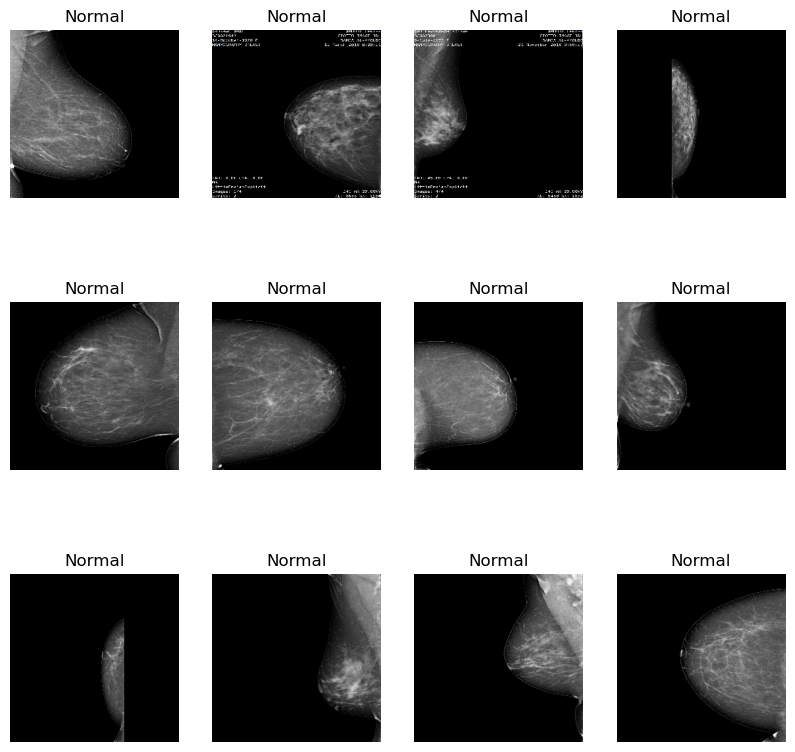

In [20]:
plt.figure(figsize=(10,10))#لتعديل المساحة بين الصور
for image_batch, label_batch in dataset.take(1):
    for i in range(12): 
        ax=plt.subplot(3,4,i+1)         #باش نقدر نطلع بالطناش الصورة
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])   #باش يطلع بإسم التصنيف متعها
        plt.axis("off")
    
    #كل مره حتطلع فيها صوره جديده
    #'  طلعت الصوره الاولى فالمجموعةكمصفوفة تلاتية الابعاد استعملت astype("uint8") لان النمباي مش حطلعها مزبوط بروحها فدرتلها تعويم

In [21]:
len(dataset)#حاليا بنقسم مجموعة البيانات للتدريب

63

In [22]:
train_size=0.8
len(dataset)*train_size
#dataset.take(10)_siz

50.400000000000006

In [23]:
train_ds = dataset.take(57)
len(train_ds)

57

In [24]:
test_ds = dataset.skip(54)
len(test_ds)

9

In [25]:
val_size=0.1
len(dataset)*val_size

6.300000000000001

In [27]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [28]:
test_ds = test_ds.skip(6)
len(test_ds)

3

In [29]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle_size=1000):#دالة تقسيم الداتاسيت
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [30]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle_size=1000):
    train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [31]:
len(train_ds)

57

In [32]:
len(val_ds)

6

In [33]:
len(test_ds)

3

In [34]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #نحسن بيانات النمودج
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)  
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:
#ندير معالجة اولية للصور قبل متخش المودل
from tensorflow.keras import layers

IMAGE_SIZE = (256, 256) #noise 

resize_and_rescale = tf.keras.Sequential([
   layers.Resizing(*IMAGE_SIZE),
   layers.Rescaling(1.0/255)
])

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# تعريف تعزيز البيانات
data_augmetation = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20
)



In [49]:
from tensorflow.keras import models, layers 


input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS) 
n_classes = 3


model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),#تحول الصوره لي مصفوفه احادية قبل متخش الطبقة التانية
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),#دالة التنشيط softmax لإعطاء احتمالات لكل فئة تصنيف
])

model.build(input_shape=input_shape)



In [51]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']

    )

In [53]:
history = model.fit(
        train_ds,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_data=val_ds
    )

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - accuracy: 0.8695 - loss: 0.4249 - val_accuracy: 0.9219 - val_loss: 0.2077
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.9330 - loss: 0.1846 - val_accuracy: 0.9844 - val_loss: 0.0793
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step - accuracy: 0.9870 - loss: 0.0648 - val_accuracy: 0.9948 - val_loss: 0.0747
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.9881 - loss: 0.0575 - val_accuracy: 0.9948 - val_loss: 0.0258
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.9836 - loss: 0.0521 - val_accuracy: 0.9896 - val_loss: 0.0230
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.9888 - loss: 0.0271 - val_accuracy: 0.9948 - val_loss: 0.0125
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.9883 - loss: 0.0295 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9948 - loss: 0.0139 - val_accuracy: 0.9948 - v

In [57]:
history

In [59]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 57}

In [60]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

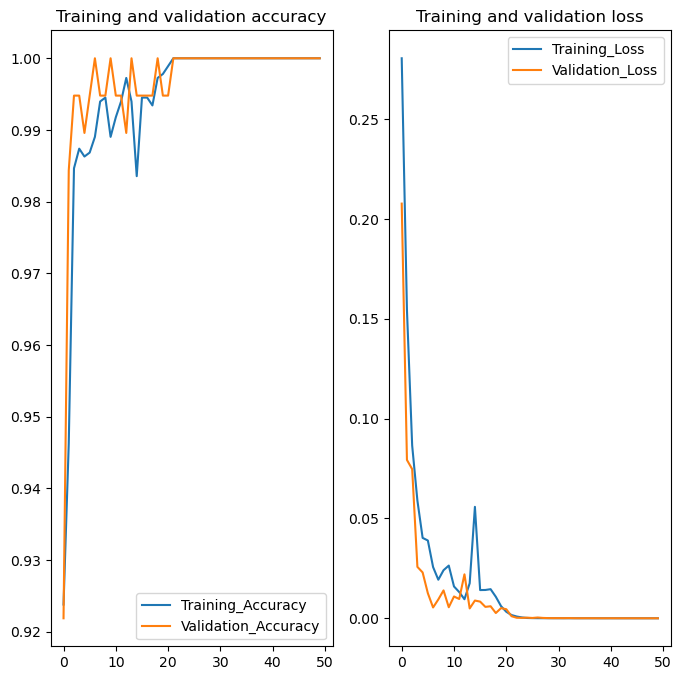

In [68]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS),acc, label= 'Training_Accuracy')
plt.plot(range(EPOCHS),val_acc, label= 'Validation_Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label= 'Training_Loss')
plt.plot(range(EPOCHS),val_loss, label= 'Validation_Loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()

first image to predict
actual label:  Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[2.6613258e-31 1.0000000e+00 0.0000000e+00]


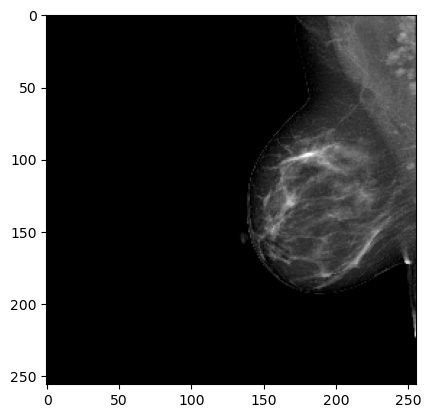

In [71]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])